 Attribute Information:
- age: Age of the person in years
- workclass: Employment type of the person
- fnlwgt: final weight
- education: Educational qualification of the person
- education-num: Number of years of education
- marital-status: Marital status of the person
- occupation: Occupation of the person
- relationship: Relationship status of the person/Role of the person in the family
- race: Human categorization of the person
- sex: Gender of the person
- capital-gain: capital gained
- capital-loss: capital loss
- hours-per-week: work hours per week
- native-country: Native country of the person
- salary: Salary of the person
- The data has a salary column along with the other categories to predict the income of the people based on a demographic.

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

/home/isaac/anaconda3/envs/opencv_env/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
df = pd.read_csv('adult_data.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.education.unique().shape

(16,)

In [39]:
df.groupby('education').count().sort_values(ascending=False)[:1]

32561

In [35]:
df['education'].value_counts()[:1]

 HS-grad    10501
Name: education, dtype: int64

The average value (mean) of "hours-per-week" for the dataset "adult_data.csv" lies

In [8]:
df['hours-per-week'].mean()

40.437455852092995

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.000,38.582,13.640,17.000,28.000,37.000,48.000,90.000
fnlwgt,32561.000,189778.367,105549.978,12285.000,117827.000,178356.000,237051.000,1484705.000
education-num,32561.000,10.081,2.573,1.000,9.000,10.000,12.000,16.000
capital-gain,32561.000,1077.649,7385.292,0.000,0.000,0.000,0.000,99999.000
capital-loss,32561.000,87.304,402.960,0.000,0.000,0.000,0.000,4356.000
hours-per-week,32561.000,40.437,12.347,1.000,40.000,40.000,45.000,99.000


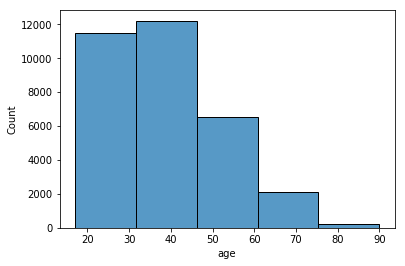

In [11]:
sns.histplot(data = df, x='age', bins=5)

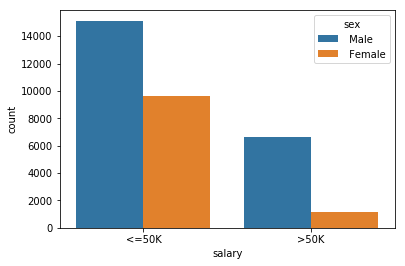

In [12]:
sns.countplot(data=df, x='salary', hue='sex')
# sns.countplot(x = 'hsc_s', data = df, hue = 'status')

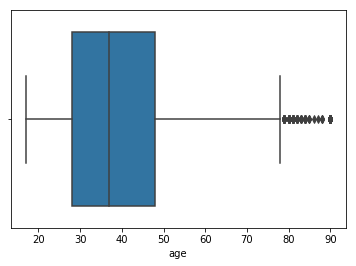

In [13]:
sns.boxplot(data=df, x='age')

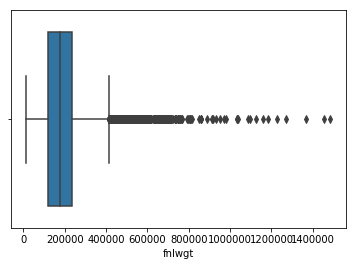

In [14]:
sns.boxplot(data=df, x='fnlwgt')

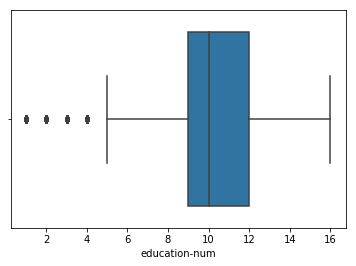

In [15]:
sns.boxplot(data=df, x='education-num')

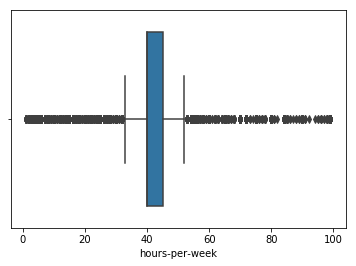

In [16]:
sns.boxplot(data=df, x='hours-per-week')

How many duplicated rows are there in the dataset?

In [18]:
df.duplicated().sum()

24

Which country ("native-country") has the highest mean value of "hours-per-week" for the dataset "adult_data.csv"?

In [19]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [23]:
df.groupby('native-country')['hours-per-week'].mean().sort_values(ascending=False)

native-country
 Thailand                     45.444
 France                       45.069
 Yugoslavia                   44.562
 Greece                       44.241
 Iran                         43.977
 Japan                        43.694
 Dominican-Republic           42.471
 Ireland                      42.417
 South                        42.413
 Portugal                     41.892
 Outlying-US(Guam-USVI-etc)   41.857
 England                      41.833
 Italy                        41.603
 India                        41.530
 ?                            41.513
 Scotland                     41.250
 Germany                      41.015
 Hong                         40.900
 Cambodia                     40.895
 United-States                40.448
 Canada                       40.405
 Mexico                       40.341
 Laos                         40.333
 Holand-Netherlands           40.000
 Philippines                  39.596
 Ecuador                      39.571
 Guatemala             

What is the average value of "capital-gain" for the dataset "adult_data.csv"?

In [24]:
df['capital-gain'].mean()

1077.6488437087312

How many people have capital-loss greater than zero (0) in the dataset "adult_data.csv"?

In [26]:
df[df['capital-loss']>0].shape

(1519, 15)

Which Occupation has the 2nd highest average working hours for dataset "adult_data.csv"?

In [27]:
df.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [28]:
df.groupby('occupation')['hours-per-week'].mean().sort_values(ascending=False)

occupation
 Farming-fishing     46.990
 Exec-managerial     44.988
 Transport-moving    44.656
 Protective-serv     42.871
 Prof-specialty      42.387
 Craft-repair        42.304
 Sales               40.781
 Machine-op-inspct   40.756
 Armed-Forces        40.667
 Tech-support        39.432
 Handlers-cleaners   37.947
 Adm-clerical        37.558
 Other-service       34.702
 Priv-house-serv     32.886
 ?                   31.906
Name: hours-per-week, dtype: float64